#### 1) Importação das Bibliotecas

In [1]:
# Importando as bibliotecas
import pyvis as pv
import networkx as nx
import pandas as pd
import numpy as np
import names
import plotly.express as px

#### 2) Criação da lista de nomes

In [2]:
# Criando uma lista de colaboradores
employees = list(set([names.get_full_name() for i in range(1000)]))

# Criando um objeto do tipo dataframe
dataset = pd.DataFrame(employees, columns = ['nome'])

#### 3) Criação das áreas de cada colaborador

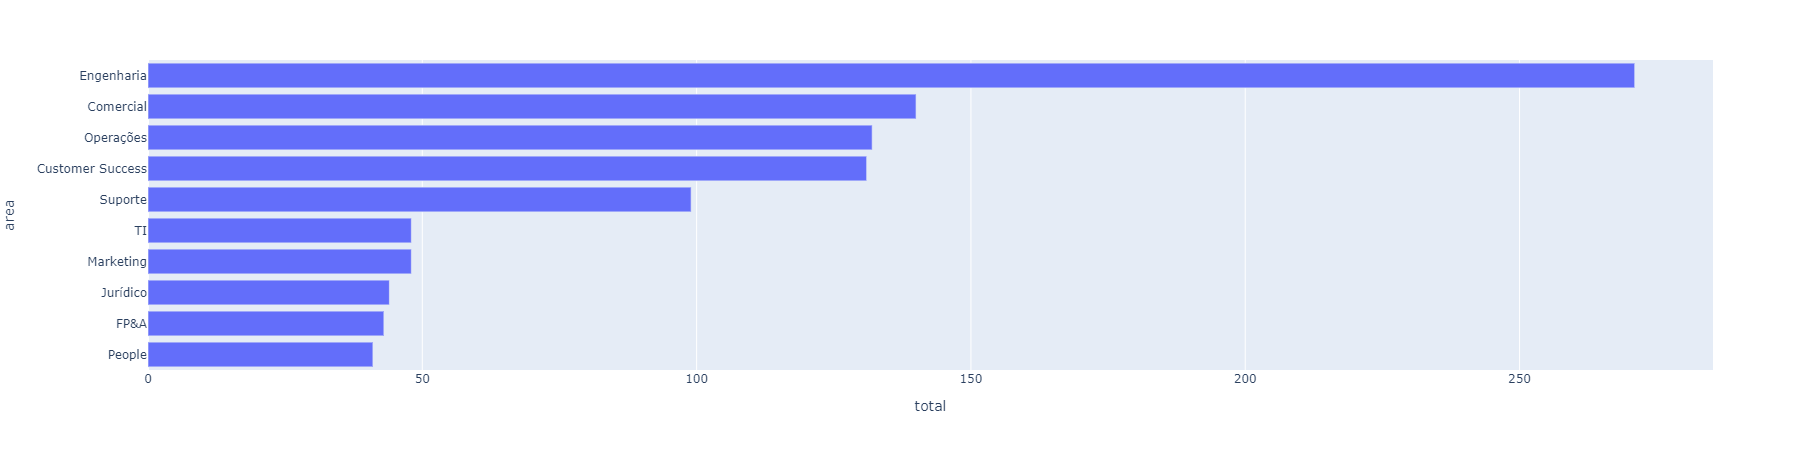

In [11]:
# Criando um dicionário de quantidade de pessoas por área
areas_dict = {
    'People': 1,
    'FP&A': 1,
    'Engenharia': 6,
    'Customer Success': 3,
    'Comercial': 3,
    'Suporte': 2,
    'Jurídico': 1,
    'TI': 1,
    'Marketing': 1,
    'Operações': 3
}

# Criando as listas das áreas e os pesos
areas = list(areas_dict.keys())
weights = [i/sum(areas_dict.values()) for i in areas_dict.values()]

# Criando uma lista de escolhas ponderadas
areas_list = np.random.choice(a = areas, size = len(dataset), p = weights)

# Incluindo a área no dataset
dataset['area'] = areas_list

# Verificando a distribuição
area_dataset = pd.DataFrame(dict(dataset.groupby(['area']).size()).items(), columns = ['area', 'total'])
fig = px.bar(area_dataset, y = 'area', x = 'total')
fig.update_layout(barmode = 'stack', yaxis = {'categoryorder': 'total ascending'})
fig.show()

#### 4) Criando o tempo de empresa, em anos, de cada colaboradoe

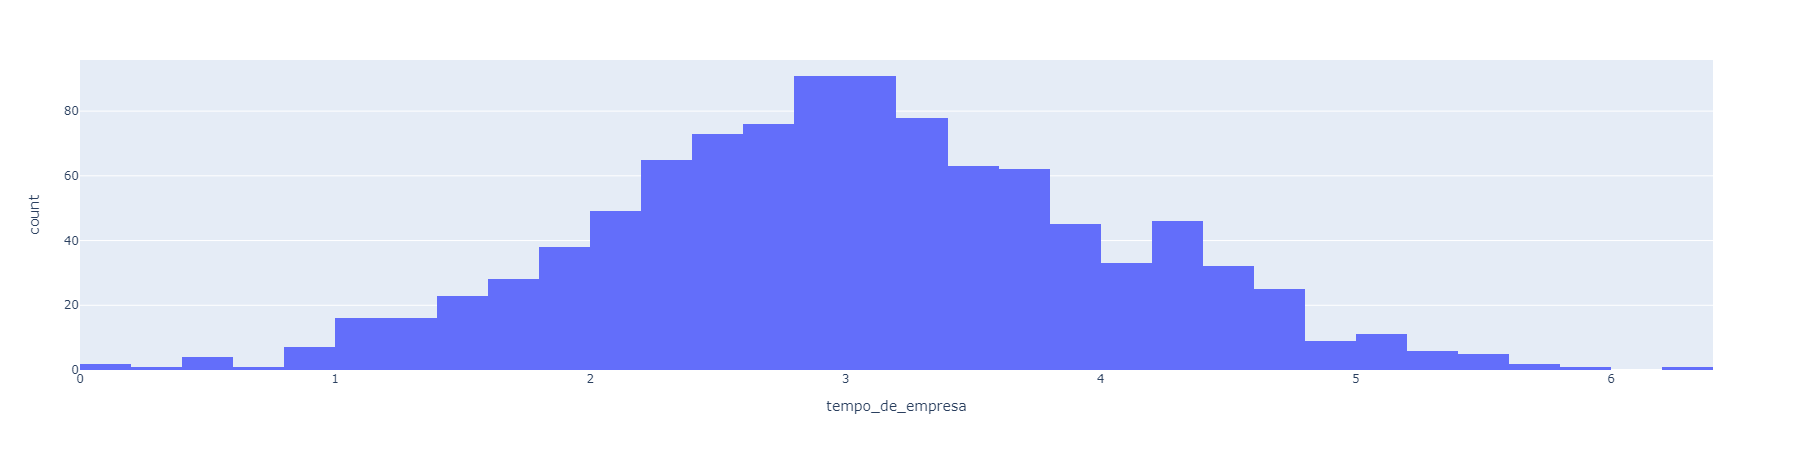

In [18]:
# Definindo o tempo médio de empresa
average_time = 3
sd_time = 1

# Criando uma amostra de tempo de empresa
company_time = np.random.normal(average_time, sd_time, len(dataset))
company_time = [round(abs(i), 2) for i in company_time]

# Adicionando ao dataset
dataset['tempo_de_empresa'] = company_time

# Plotando
fig = px.histogram(dataset, x = "tempo_de_empresa")
fig.show()

#### 5) Criando o último salário, em reais, de cada colaborador

In [ ]:
# Criando um dicionário de pesos salariais para as áreas
salary_dict = {
    'People': 1,
    'FP&A': 1,
    'Engenharia': 3,
    'Customer Success': 1.5,
    'Comercial': 2,
    'Suporte': 1.5,
    'Jurídico': 1,
    'TI': 1,
    'Marketing': 1,
    'Operações': 1.5
}

# Definindo o salário base médio e o desvio padrão
average_salary = 3000
sd_salary = 500

# Criando uma amostra de tempos de empresa
area_average_salary = np.random.normal(average_salary, sd_salary, len(dataset))
area_average_salary = [round(abs(i), 2) for i in company_time]